In [1]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示t

--2021-04-08 10:56:32--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
ai.stanford.edu (ai.stanford.edu) をDNSに問いあわせています... 171.64.68.10
ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84125825 (80M) [application/x-gzip]
`aclImdb_v1.tar.gz.2' に保存中

aclImdb_v1.tar.gz.2 100%[===================>]  80.23M  3.28MB/s 時間 27s        

2021-04-08 10:57:00 (2.97 MB/s) - `aclImdb_v1.tar.gz.2' へ保存完了 [84125825/84125825]



In [4]:
!cat aclImdb/README

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

In [5]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [6]:
# 確認
train_review.keys()
# data；データ
# filenames：txtファイルの名前
# target_names：[neg,pos] 0,1のtargetの名称 
# target：0,1表現

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [7]:
# 確認
test_review.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
x_test # ネガポジ判定をするための文章
y_test # ネガポジのラベル

array([1, 0, 1, ..., 0, 0, 0])

In [9]:
# BoW(back of Words)
mini_dataset = \
["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [10]:
mini_dataset

['This movie is very good.',
 'This film is a good',
 'Very bad. Very, very bad.']

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')  #　大文字を小文字に揃える処理有
# \b = 境界線
# \w = 1文字
# \w+ = １文字以上の文字
# \w\w+ = ２文字以上の文字
# 意味：境界線/１文字以上の文字/境界線　でとって来てほしい

bow = vectorizer.fit_transform(mini_dataset).toarray()
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
df

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [12]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
print(bow_train.shape)
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

(3, 11)


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


# 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。


In [13]:
small_datasets = \
['This movie is SOOOO funny!!!',
'What a movie! I never',
'best movie ever!!!!! this movie']

In [14]:
small_datasets[0].split(' ')

['This', 'movie', 'is', 'SOOOO', 'funny!!!']

In [15]:
# ユニグラム
import numpy as np
import re

def bow(small_datasets):
    str_list = []
    
    # リストの中の文字を分割
    for i,j in enumerate(small_datasets):
        data_split = small_datasets[i].split(' ')
        for k in range(len(data_split)):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            str_list.append(data_split[k].lower())
    
    str_list = np.array(str_list)
    str_list = np.unique(str_list)
    print(str_list)
    
    # サイズを生成
    data = np.zeros((len(small_datasets), len(str_list)))
    
    for i in range(data.shape[0]):
        data_split = small_datasets[i].split(' ')
        
        length = len(data_split)
        for k in range(length):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            #print(data_split[k])
            for j in range(data.shape[1]):
                if str_list[j] == data_split[k].lower():
                    data[i,j] += 1
                else:
                    data[i,j] += 0
    return data       
data = bow(small_datasets).astype(np.int)
df = pd.DataFrame(data, columns=vectorizer.get_feature_names())
df

['a' 'best' 'ever' 'funny' 'i' 'is' 'movie' 'never' 'soooo' 'this' 'what']


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


In [16]:
# 上と一致
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')  #　大文字を小文字に揃える処理有
bow = vectorizer.fit_transform(small_datasets).toarray()
print(bow)
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
df

[[0 0 0 1 0 1 1 0 1 1 0]
 [1 0 0 0 1 0 1 1 0 0 1]
 [0 1 1 0 0 0 2 0 0 1 0]]


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


In [17]:
# バイグラム
import numpy as np
import re

def bow(small_datasets):
    str_list = []
    str_list2 = []
    
    # リストの中の文字を分割
    for i,j in enumerate(small_datasets):
        data_split = small_datasets[i].split(' ')
        for k in range(len(data_split)):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            data_split[k] = data_split[k].lower()
        str_list.append(data_split)

    #print(str_list)
    
    for i, pair_list in enumerate(str_list):
        for k in range(len(data_split)-1):
            str_list2.append(pair_list[k:k+2])
    
    str_list_shape = np.array(str_list)
    #print(str_list_shape.shape[1])
    str_list = str_list_shape.flatten()
    str_list2 = np.array(str_list2) # データ
    #print(str_list2)
    str_list2_unique = np.unique(str_list2, axis=0) # カラム
    #print(str_list)
    #print(str_list2_unique)
    #print(all(str_list2[11] == str_list2_unique[10]))
    
    data = np.zeros((len(small_datasets), len(str_list2_unique)))
    #print(data.shape)
    for i in range(data.shape[0]):
        for k in range(str_list_shape.shape[1]-1):# 4
            for j in range(data.shape[1]): #11
                if all(str_list2[(str_list_shape.shape[1]-1)*i+k] == str_list2_unique[j]):
                    data[i,j] += 1
                else:
                    data[i,j] += 0
    return data       

data = bow(small_datasets).astype(np.int)
data
df = pd.DataFrame(data, columns=vectorizer.get_feature_names())
display(df)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


In [18]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(small_datasets)).toarray()
print(bow_train.shape)
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

# スクラッチと同じ計算

(3, 11)


,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


In [19]:
small_datasets = \
['This movie is SOOOO funny!!!',
'What a movie! I never',
'best movie ever!!!!! this movie']

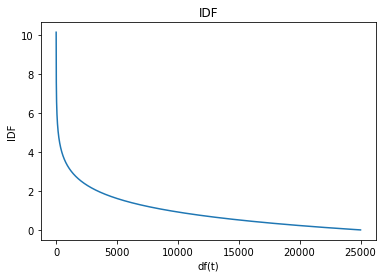

In [20]:
# idfの確認
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

# トークンの出現回数が低い程、idfは大きくなる。

In [21]:
# ストップワード除去
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [22]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...



stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuki.tatsuoka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。

In [23]:
x_test
y_test

array([1, 0, 1, ..., 0, 0, 0])

In [24]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b',stop_words=stop_words, max_features=5000)
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()

In [26]:
train_tfidf.shape, test_tfidf.shape

((25000, 5000), (25000, 5000))

In [27]:
df = pd.DataFrame(train_tfidf, columns=tfidf.get_feature_names())
df

,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.164505,0.0,0.0,0.0,0.136932,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.124442,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.085006,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.000000,0.000000,0.052273,0.0,0.0,0.0,0.0,...,0.095763,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.000000,0.068246,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.101521,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi = LogisticRegression()
model = logi.fit(train_tfidf, y_train)

pred = model.predict(test_tfidf)

In [29]:
print(pred)
accuracy_score(pred, y_test)
# そこそこ精度高め。

[1 0 1 ... 0 0 0]


0.88372

In [30]:
# 次元を選択せずに実行
tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w\w+\b',
                        stop_words=stop_words, 
                        #ngram_range=(2,2), 次元が増えて不可
                        min_df=0.01, # 出現率が0.01以下のものは消す
                        #max_df = 0.9
                       )
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()
train_tfidf.shape

(25000, 1673)

In [31]:
test_tfidf.shape

(25000, 1673)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi = LogisticRegression()
model = logi.fit(train_tfidf, y_train)

In [33]:
pred = model.predict(test_tfidf)

In [34]:
print(pred)
accuracy_score(pred, y_test)
# 次元を減らしすぎると減少した。

[1 0 1 ... 0 0 0]


0.87344

In [35]:
import gc

del model
gc.collect()


136

In [36]:
# 次元を選択せずに実行
tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b',
                        stop_words=stop_words, 
                        #ngram_range=(2,2), 次元が増えて不可
                        #min_df=0.001, # 削除したい頻出頻度の低い割合
                        max_df = 0.1 # 削除したい頻出頻度の高い割合
                       )
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()
train_tfidf.shape

(25000, 74624)

In [37]:
test_tfidf.shape

(25000, 74624)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi = LogisticRegression()
model = logi.fit(train_tfidf, y_train)

KeyboardInterrupt: 

In [ ]:
pred = model.predict(test_tfidf)

In [ ]:
print(pred)
accuracy_score(pred, y_test)
# zigenn5000と比較した場合ほんのり向上。

# 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

In [66]:
small_datasets = \
['This movie is SOOOO funny!!!',
'What a movie! I never',
'best movie ever!!!!! this movie']

In [95]:
# ユニグラム
# 関数を割っても良き
import numpy as np
import re

def tf(small_datasets):
    str_list = []
    
    # リストの中の文字を分割
    for i,j in enumerate(small_datasets):
        data_split = small_datasets[i].split(' ')
        for k in range(len(data_split)):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            str_list.append(data_split[k].lower())
    
    str_list = np.array(str_list)
    #print(str_list)
    str_list = np.unique(str_list)
    print(str_list)
    
    # サイズを生成
    data = np.zeros((len(small_datasets), len(str_list)))
    
    for i in range(data.shape[0]):
        data_split = small_datasets[i].split(' ')
        length = len(data_split)
        for k in range(length):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            sample_count = data_split.count(data_split[k])
            for j in range(data.shape[1]):
                sum_token = np.count_nonzero(data[:, j])
                if str_list[j] == data_split[k].lower():
                    data[i,j] = sample_count#*(np.log((data.shape[0]+1)/(sum_token+1))+1)
                else:
                    data[i,j] += 0
    return data       

def idf(data):
    data2 = np.zeros((data.shape[0], data.shape[1]))
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            sum_token = np.count_nonzero(data[:, j])

            if data[i, j] >=1:
                data2[i,j] = data[i,j]*np.log((1+data.shape[0])/(1+sum_token)) + 1
            else:
                pass
    return data2
    
data = tf(small_datasets).astype(np.float)
data2 = idf(data)

df = pd.DataFrame(data2, columns=tfidf.get_feature_names())
df

['a' 'best' 'ever' 'funny' 'i' 'is' 'movie' 'never' 'soooo' 'this' 'what']


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.287682,0.000000


In [68]:
tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', norm=False)
small_tfidf = tfidf.fit_transform(small_datasets).toarray()

df =pd.DataFrame(small_tfidf, columns=tfidf.get_feature_names())
df

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


In [43]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, vector_size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備(sentenceから語彙を構築)
model.train(sentences, total_examples=model.corpus_count, epochs=5) # 学習
#  total_examples = 文の数

print("語彙の一覧 : {}".format(model.wv.key_to_index))
for vocabs in model.wv.key_to_index:
    print("{}のベクトル : \n{}".format(vocabs, model.wv[vocabs]))

語彙の一覧 : {'very': 0, 'bad': 1, 'good': 2, 'is': 3, 'this': 4, 'a': 5, 'film': 6, 'movie': 7}
veryのベクトル : 
[-0.00536227  0.0023643   0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458871  0.08972988 -0.05015428 -0.03763373]
badのベクトル : 
[ 0.07380505 -0.01533473 -0.04536615  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448819]
goodのベクトル : 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350889 -0.03405366
 -0.00946403  0.05768573 -0.07521639 -0.03936105]
isのベクトル : 
[-0.07511629 -0.00930048  0.09538178 -0.07319212 -0.02333784 -0.01937754
  0.08077486 -0.05930933  0.00045162 -0.04753765]
thisのベクトル : 
[-0.0960355   0.05007293 -0.08759587 -0.04391825 -0.000351   -0.00296183
 -0.0766124   0.09614742  0.04982056  0.09233143]
aのベクトル : 
[-0.08157919  0.04495797 -0.04137077  0.00824535  0.08498619 -0.04462178
  0.045175   -0.06786962 -0.03548489  0.09398508]
filmのベクトル : 
[-0.01577674  0.00321376 -0.04140681 -0.07682785 -0.01508028  0.02469826
 -0.00888039

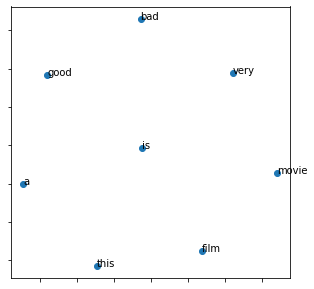

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.key_to_index
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [60]:
train_list = []

for text in x_train:
    text = text.lower() # 小文字化
    text = text.replace('/', '').replace('-', '').\
    replace('<br />', '').replace('"', '').replace('', '').\
    replace('!', '').replace('?', '').replace('<br >', '')
    text = ' '.join(text.split(' '))
    train_list.append(text)

train_list

["zero day leads you to think, even rethink why two boysyoung men would do what they did  commit mutual suicide via slaughtering their classmates. it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their ownmutual world via coupled destruction.it is not a perfect movie but given what moneytime the filmmaker and actors had  it is a remarkable product. in terms of explaining the motives and actions of the two young suicidemurderers it is better than 'elephant'  in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. flawed but honest with a terrible honesty.",
 "words can't describe how bad this movie is. i can't explain it by writing only. you have too see it for yourself to get at grip of how horrible a movie really can be. not that i recommend you to do that. there are so many clichés, mistakes (and all other negati

# 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [291]:
model = Word2Vec(min_count=1, vector_size=5000) # 次元数を10に設定
model.build_vocab(train_list) # 準備(sentenceから語彙を構築)
model.train(train_list, total_examples=model.corpus_count, epochs=5) # 学習

(29491499, 161675195)

In [294]:
print("語彙の一覧 : {}".format(model.wv.key_to_index))
for vocabs in model.wv.key_to_index:
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocabs]))

語彙の一覧 : {' ': 0, 'e': 1, 't': 2, 'a': 3, 'i': 4, 'o': 5, 's': 6, 'n': 7, 'r': 8, 'h': 9, 'l': 10, 'd': 11, 'c': 12, 'm': 13, 'u': 14, 'f': 15, 'g': 16, 'y': 17, 'w': 18, 'p': 19, 'b': 20, '.': 21, 'v': 22, ',': 23, 'k': 24, "'": 25, 'j': 26, 'x': 27, ')': 28, '(': 29, 'z': 30, 'q': 31, '0': 32, '1': 33, ':': 34, '9': 35, '2': 36, '*': 37, ';': 38, '3': 39, '5': 40, '8': 41, '4': 42, '7': 43, '&': 44, '6': 45, 'é': 46, '\x96': 47, '`': 48, '$': 49, '\x85': 50, '_': 51, '%': 52, '=': 53, '#': 54, '+': 55, '\x97': 56, '´': 57, '>': 58, '’': 59, '~': 60, ']': 61, '}': 62, 'è': 63, '{': 64, '<': 65, '[': 66, 'á': 67, '@': 68, '–': 69, '\x91': 70, '£': 71, 'ä': 72, 'í': 73, '¨': 74, 'ô': 75, 'ü': 76, 'ó': 77, '\t': 78, 'à': 79, 'ö': 80, 'ç': 81, '¡': 82, '^': 83, 'ñ': 84, 'ï': 85, 'â': 86, '“': 87, 'ë': 88, '”': 89, 'ê': 90, 'ã': 91, '½': 92, 'å': 93, '»': 94, 'ú': 95, '\x84': 96, '«': 97, '\x8e': 98, '\x9e': 99, '\\': 100, '|': 101, '¦': 102, '·': 103, '\x95': 104, '§': 105, 'ø': 106, '\uf0

/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/li

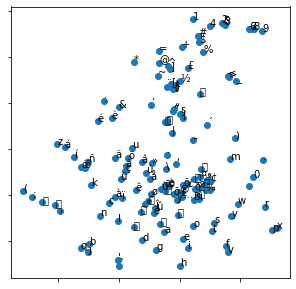

In [295]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.key_to_index
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [96]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, vector_size=5000) # 次元数を10に設定
model.build_vocab(train_list) # 準備(sentenceから語彙を構築)
model.train(train_list, total_examples=model.corpus_count, epochs=5) # 学習
#  total_examples = 文の数

print("語彙の一覧 : {}".format(model.wv.key_to_index))
for vocabs in model.wv.key_to_index:
    print("{}のベクトル : \n{}".format(vocabs, model.wv[vocabs]))

語彙の一覧 : {' ': 0, 'e': 1, 't': 2, 'a': 3, 'i': 4, 'o': 5, 's': 6, 'n': 7, 'r': 8, 'h': 9, 'l': 10, 'd': 11, 'c': 12, 'm': 13, 'u': 14, 'f': 15, 'g': 16, 'y': 17, 'w': 18, 'p': 19, 'b': 20, '.': 21, 'v': 22, ',': 23, 'k': 24, "'": 25, 'j': 26, 'x': 27, ')': 28, '(': 29, 'z': 30, 'q': 31, '0': 32, '1': 33, ':': 34, '9': 35, '2': 36, '*': 37, ';': 38, '3': 39, '5': 40, '8': 41, '4': 42, '7': 43, '&': 44, '6': 45, 'é': 46, '\x96': 47, '`': 48, '$': 49, '\x85': 50, '_': 51, '%': 52, '=': 53, '#': 54, '+': 55, '\x97': 56, '´': 57, '>': 58, '’': 59, '~': 60, ']': 61, '}': 62, 'è': 63, '{': 64, '<': 65, '[': 66, 'á': 67, '@': 68, '–': 69, '\x91': 70, '£': 71, 'ä': 72, 'í': 73, '¨': 74, 'ô': 75, 'ü': 76, 'ó': 77, '\t': 78, 'à': 79, 'ö': 80, 'ç': 81, '¡': 82, '^': 83, 'ñ': 84, 'ï': 85, 'â': 86, '“': 87, 'ë': 88, '”': 89, 'ê': 90, 'ã': 91, '½': 92, 'å': 93, '»': 94, 'ú': 95, '\x84': 96, '«': 97, '\x8e': 98, '\x9e': 99, '\\': 100, '|': 101, '¦': 102, '·': 103, '\x95': 104, '§': 105, 'ø': 106, '\uf0

/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuki.tatsuoka/opt/anaconda3/li

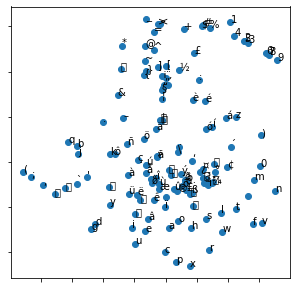

In [97]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.key_to_index
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()